In [64]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
#Carga de datos
df = pd.read_csv('telco_customer_churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
# Verificar datos nulos
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
customerID,7043,0,0.0
gender,7043,0,0.0
SeniorCitizen,7043,0,0.0
Partner,7043,0,0.0
Dependents,7043,0,0.0
tenure,7043,0,0.0
PhoneService,7043,0,0.0
MultipleLines,7043,0,0.0
InternetService,7043,0,0.0
OnlineSecurity,7043,0,0.0


In [67]:
#Ver duplicados

# Detectar filas duplicadas
duplicados = df[df.duplicated()]

# Mostrar cantidad de filas duplicadas
cantidad_duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {cantidad_duplicados}")

Cantidad de filas duplicadas: 0


In [68]:
#Verificación de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
#Verificar formato
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [70]:
# Reemplazar valores no numéricos por NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Luego, convertir a float
df['TotalCharges'] = df['TotalCharges'].astype('float')

#Verificar formato nuevamente
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [71]:
# Verificar datos nulos nuevamente
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7032,11,0.16
gender,7043,0,0.00
SeniorCitizen,7043,0,0.00
Partner,7043,0,0.00
customerID,7043,0,0.00
Dependents,7043,0,0.00
tenure,7043,0,0.00
MultipleLines,7043,0,0.00
PhoneService,7043,0,0.00
OnlineSecurity,7043,0,0.00


In [72]:
#Verificar datos nulos en TotalCharges
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [73]:
#Rellenar valores nulos en TotalCharges con media
#En la verificación anterior se pudo ver que la media no se aleja mucho de la desviación estandar por lo que se utilizará para rellenar los campos faltantes

# Calcular la media de la columna TotalCharges
media_total_charges = df['TotalCharges'].mean()

# Rellenar los valores nulos con la media
df['TotalCharges'].fillna(media_total_charges, inplace=True)

#Verificación de datos nulos nuevamente
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

C:\Users\edamv\AppData\Local\Temp\ipykernel_12928\4041137915.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(media_total_charges, inplace=True)


,datos sin NAs en q,Na en q,Na en %
customerID,7043,0,0.0
gender,7043,0,0.0
SeniorCitizen,7043,0,0.0
Partner,7043,0,0.0
Dependents,7043,0,0.0
tenure,7043,0,0.0
PhoneService,7043,0,0.0
MultipleLines,7043,0,0.0
InternetService,7043,0,0.0
OnlineSecurity,7043,0,0.0


In [74]:
# Cambiar tipo object por category 
columnas = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for columna in columnas:
    df[columna] = df[columna].astype('category')

#Verificar formato nuevamente
print(df.dtypes)

customerID            object
gender                object
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines         object
InternetService       object
OnlineSecurity      category
OnlineBackup          object
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract              object
PaperlessBilling    category
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [75]:
#Cambio de formato object por str
columnas_str = ['customerID', 'gender', 'MultipleLines', 'InternetService', 'OnlineBackup', 'Contract', 'PaymentMethod']

for columna_str in columnas_str:
    df[columna_str] = df[columna_str].astype(str)

#Verificar formato nuevamente
print(df.dtypes)


customerID            object
gender                object
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines         object
InternetService       object
OnlineSecurity      category
OnlineBackup          object
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract              object
PaperlessBilling    category
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [76]:
# Verificación de formatos cambiados 
for columna in columnas:
    print(f"Columna: {columna}, Tipo de datos: {df[columna].dtype}, Ejemplo: {df[columna].iloc[0]}")

for columna_str in columnas_str:
    print(f"Columna: {columna_str}, Tipo de datos: {df[columna_str].dtype}, Ejemplo: {df[columna_str].iloc[0]}")


Columna: Partner, Tipo de datos: category, Ejemplo: Yes
Columna: Dependents, Tipo de datos: category, Ejemplo: No
Columna: PhoneService, Tipo de datos: category, Ejemplo: No
Columna: OnlineSecurity, Tipo de datos: category, Ejemplo: No
Columna: DeviceProtection, Tipo de datos: category, Ejemplo: No
Columna: TechSupport, Tipo de datos: category, Ejemplo: No
Columna: StreamingTV, Tipo de datos: category, Ejemplo: No
Columna: StreamingMovies, Tipo de datos: category, Ejemplo: No
Columna: PaperlessBilling, Tipo de datos: category, Ejemplo: Yes
Columna: Churn, Tipo de datos: category, Ejemplo: No
Columna: customerID, Tipo de datos: object, Ejemplo: 7590-VHVEG
Columna: gender, Tipo de datos: object, Ejemplo: Female
Columna: MultipleLines, Tipo de datos: object, Ejemplo: No phone service
Columna: InternetService, Tipo de datos: object, Ejemplo: DSL
Columna: OnlineBackup, Tipo de datos: object, Ejemplo: Yes
Columna: Contract, Tipo de datos: object, Ejemplo: Month-to-month
Columna: PaymentMetho

In [77]:
#Verificar valores únicos por columna

for columna_total in df.columns:
    es_unico = df[columna_total].is_unique
    print(f"Columna: {columna_total}, Valores únicos: {es_unico}")


Columna: customerID, Valores únicos: True
Columna: gender, Valores únicos: False
Columna: SeniorCitizen, Valores únicos: False
Columna: Partner, Valores únicos: False
Columna: Dependents, Valores únicos: False
Columna: tenure, Valores únicos: False
Columna: PhoneService, Valores únicos: False
Columna: MultipleLines, Valores únicos: False
Columna: InternetService, Valores únicos: False
Columna: OnlineSecurity, Valores únicos: False
Columna: OnlineBackup, Valores únicos: False
Columna: DeviceProtection, Valores únicos: False
Columna: TechSupport, Valores únicos: False
Columna: StreamingTV, Valores únicos: False
Columna: StreamingMovies, Valores únicos: False
Columna: Contract, Valores únicos: False
Columna: PaperlessBilling, Valores únicos: False
Columna: PaymentMethod, Valores únicos: False
Columna: MonthlyCharges, Valores únicos: False
Columna: TotalCharges, Valores únicos: False
Columna: Churn, Valores únicos: False


In [78]:
# Limpieza de cadenas
import re

def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra, pero mantiene los caracteres internos.
    3. Elimina paréntesis y su contenido al final de la cadena.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        
        # 2. Eliminar paréntesis y su contenido al final de la cadena
        cadena = re.sub(r'\s*\([^)]*\)\s*$', '', cadena)
        
        # 3. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
    
        return cadena
    
    return cadena


In [79]:
# Verificación de datos anómalos 
# Función para verificar el contenido de cada columna
def verificar_contenido_columnas(dataframe):
    for columna_total in dataframe.columns:
        valores_unicos = dataframe[columna_total].unique()  # Obtener todos los valores únicos
        print(f"Columna: {columna_total}")
        print(f"Ejemplos de valores: {valores_unicos[:10]}")  # Muestra los primeros 5 valores únicos
        print(f"Cantidad de valores únicos: {len(valores_unicos)}")
        print("-" * 40)

# Uso de la función con tu DataFrame
verificar_contenido_columnas(df)


Columna: customerID
Ejemplos de valores: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU']
Cantidad de valores únicos: 7043
----------------------------------------
Columna: gender
Ejemplos de valores: ['Female' 'Male']
Cantidad de valores únicos: 2
----------------------------------------
Columna: SeniorCitizen
Ejemplos de valores: [0 1]
Cantidad de valores únicos: 2
----------------------------------------
Columna: Partner
Ejemplos de valores: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Cantidad de valores únicos: 2
----------------------------------------
Columna: Dependents
Ejemplos de valores: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Cantidad de valores únicos: 2
----------------------------------------
Columna: tenure
Ejemplos de valores: [ 1 34  2 45  8 22 10 28 62 13]
Cantidad de valores únicos: 73
----------------------------------------
Columna: PhoneService
Ejemplos de valor

In [80]:
# Estadística descriptiva
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [81]:
#Visualización breve de df
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


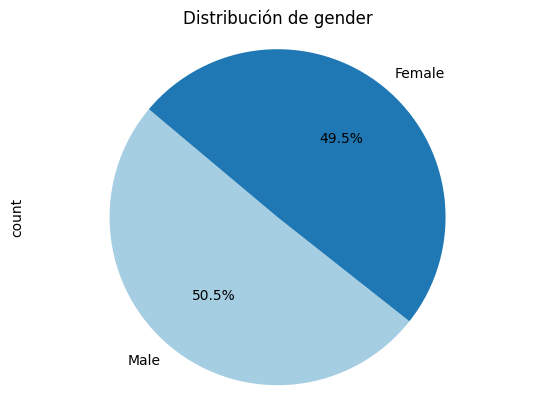

In [82]:
#Visualizaciones univariadas - Gráfico de Torta

df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Distribución de gender')
plt.show()

#En este gráfico se puede visualizar la distribución del género de los clientes de Telco. En la misma puede verse que la proporción de clientes hombres es ligeramente mayor 50.5% con respecto a las mujeres 49.5%. 

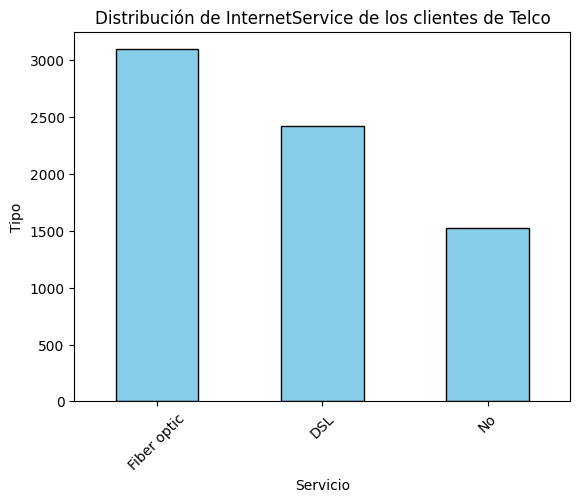

In [83]:
#Visualizaciones univariadas - Gráfico de Barras
df['InternetService'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Servicio')
plt.ylabel('Tipo')
plt.title('Distribución de InternetService de los clientes de Telco')
plt.xticks(rotation=45)
plt.show()

#En este gráfico se puede ver que hay tres grupos de servicios de internet: Fibra óptica que constituye el mayor número, superando los 3000, las personas con DSL constituyen alrededor de 2400 y las personas que no cuentan con servicio de internet son inferiores a 1500. 


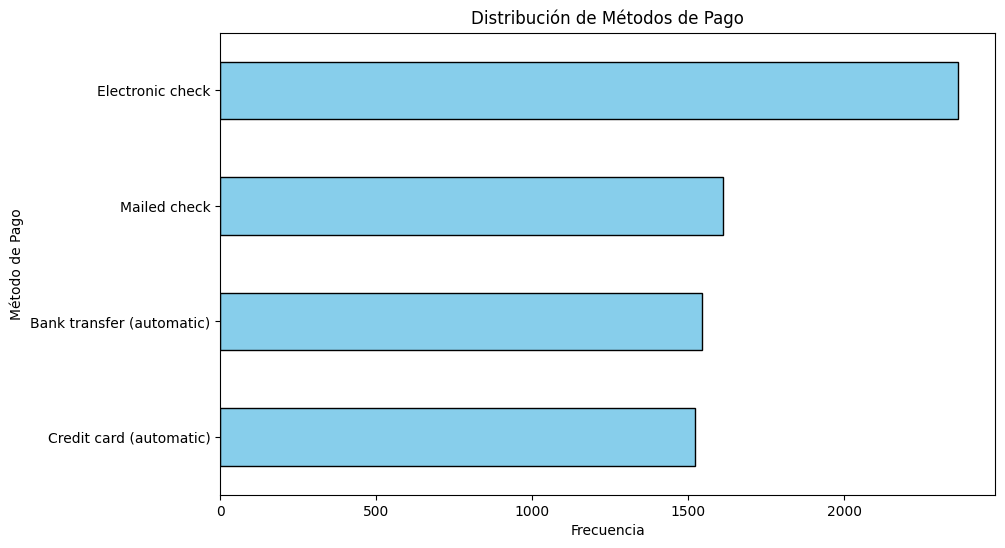

In [84]:
# Visualizaciones univariadas - Gráfico de barras horizontales

# Ordenar valores en orden ascendente
payment_counts = df['PaymentMethod'].value_counts().sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Método de Pago')
plt.title('Distribución de Métodos de Pago')
plt.show()

# En el gráfico puede distinguirse cuatro métodos de pago ordenados de mayor a menor frecuencia a continuación: Electronic check, Mailed check, Bank transfer y Credit card. En el mismo puede verse que los procesos de pago automáticos (Bank transfer y Credit card) están por detrás del Electronic check y el Mailed check superando ligeramente los 1500 apróximadamente. Si bien el Mailed check supera ligeramente los valores de pago automático, se puede ver que el Electronic check sí supera con creces todos los demás tipos de pago.


In [85]:
# Verificar cantidad de filas y columnas
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


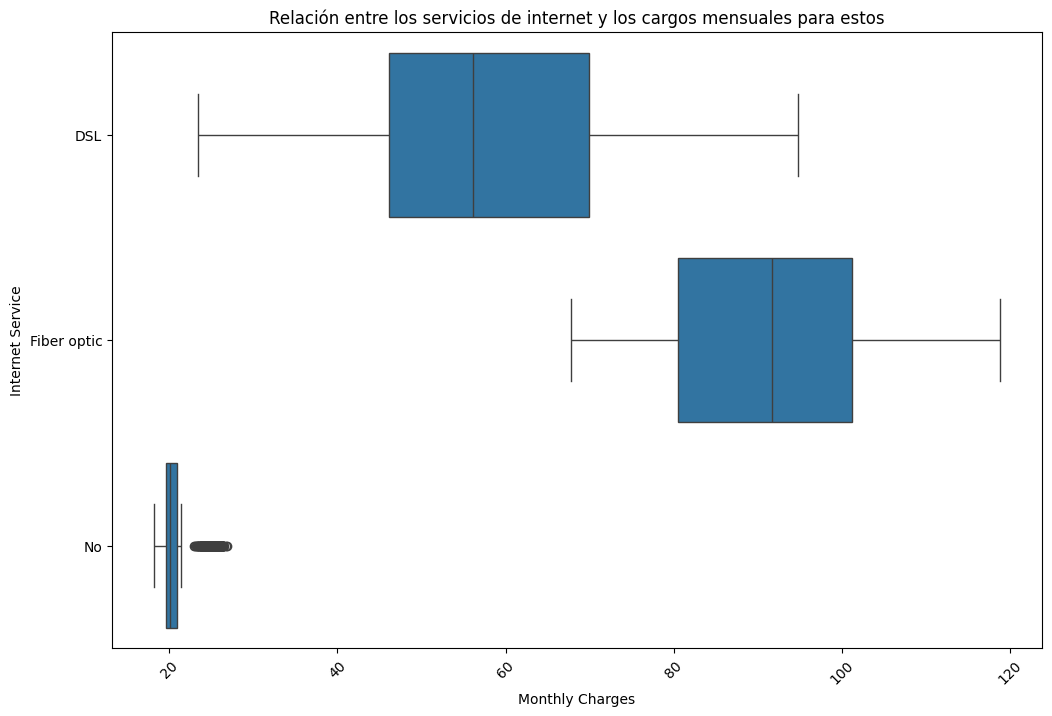

In [86]:
# Visualizaciones Multivariadas - Gráfico de Cajas

plt.figure(figsize=(12, 8))
sns.boxplot(x='MonthlyCharges', y='InternetService', data=df)
plt.xlabel('Monthly Charges')
plt.ylabel('Internet Service')
plt.title('Relación entre los servicios de internet y los cargos mensuales para estos')
plt.xticks(rotation=45)
plt.show()

# En esta visualización se puede ver los cargos mensuales para los diferentes servicios de internet. Para los que cuentan con DSL el rango de recargo mensual oscila entre 45 a 70. Los que no cuentan con servicio de internet se quedan con recargo de 20 apróximadamente y por último los que cuentan con Fiber optic son los que cuentan con recargo más elevado de entre 80 a 100 por mes. 

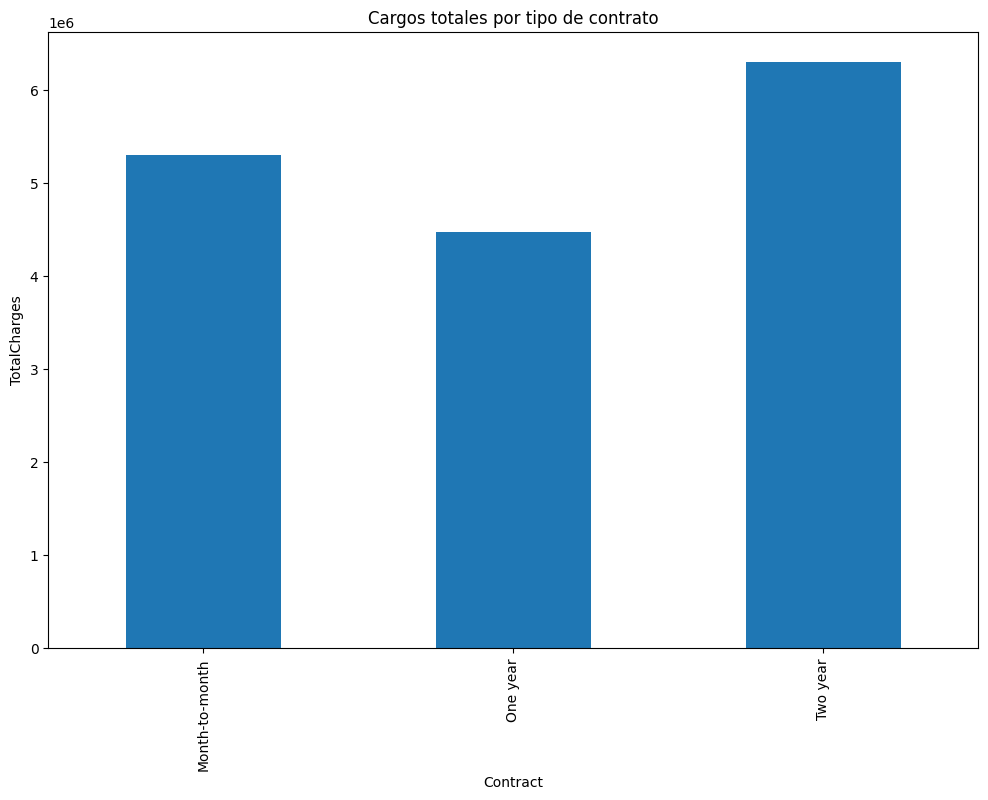

In [87]:
# Visualizaciones Multivariadas - Gráfico de Barras
plt.figure(figsize=(12, 8))
contract_totalcharges = df.groupby('Contract')['TotalCharges'].sum()
contract_totalcharges.plot(kind='bar')
plt.xlabel('Contract')
plt.ylabel('TotalCharges')
plt.title('Cargos totales por tipo de contrato')
plt.show()

#En este gráfico se puede visualizar los diferentes tipos de contratos con sus respectivos recargos totales. El orden es el siguiente, de menor a mayor: el contrato tipo One-year con alrededor de 4000000, el contrato Month-to-month con un poco más de 5000000 y por último, el contrato Two yaer con más de 6000000.

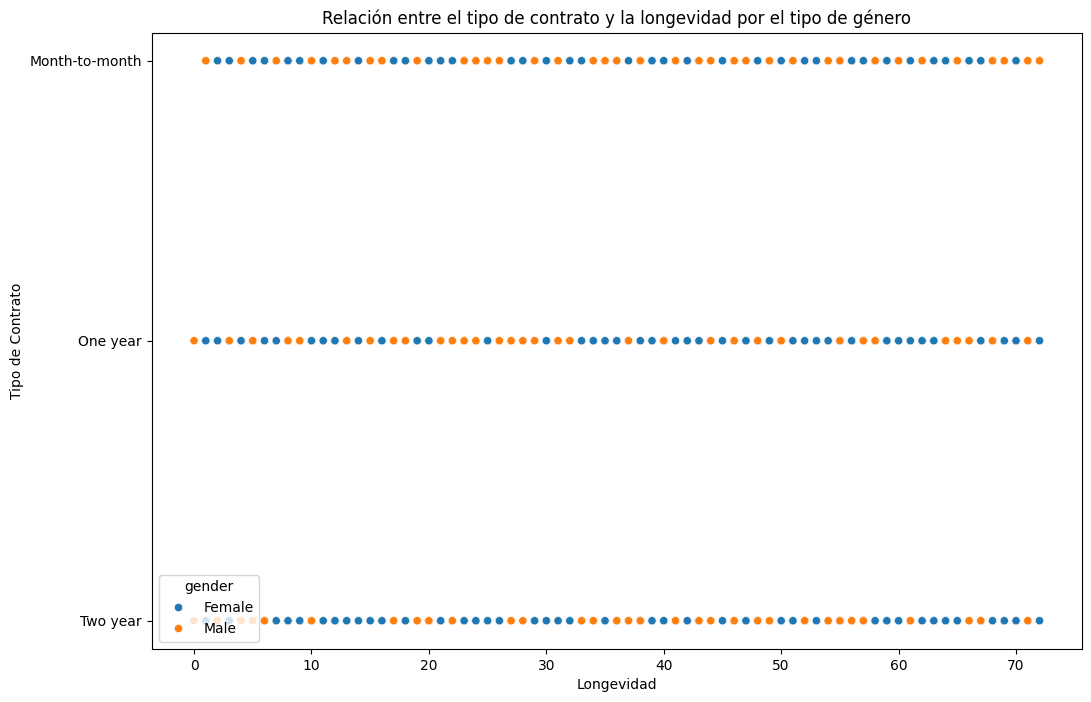

In [88]:
#Visualizaciones multivariadas - Gráfico de Dispersión con hue
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='Contract', hue='gender', data=df)
plt.xlabel('Longevidad')
plt.ylabel('Tipo de Contrato')
plt.title('Relación entre el tipo de contrato y la longevidad por el tipo de género')
plt.show()

# En este gráfico puede verse la distribución de longevidad con respecto a los tres tipos de contrato segmentado por el género. En todos los tipos de contrato pueden verse que comienza con un punto naranja que representa el género de mujer, sin embargo sólo en el contrato Month-to-month puede verse que la mujer tiende a ser más tenure. En los contratos restantes, One year y Two year puede notarse que el hombre o punto azul es el que resulta más tenure, así también, puede notarse que el contrato tipo Two year, el género hombre cuenta con más presencia (más puntos azules) a diferencia de la mujer (puntos naranjas).